In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv('/content/Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [201]:
df = df[df['FrequentFlyer'] != 'No Record']

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         894 non-null    int64 
 1   FrequentFlyer               894 non-null    object
 2   AnnualIncomeClass           894 non-null    object
 3   ServicesOpted               894 non-null    int64 
 4   AccountSyncedToSocialMedia  894 non-null    object
 5   BookedHotelOrNot            894 non-null    object
 6   Target                      894 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 55.9+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'ServicesOpted'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

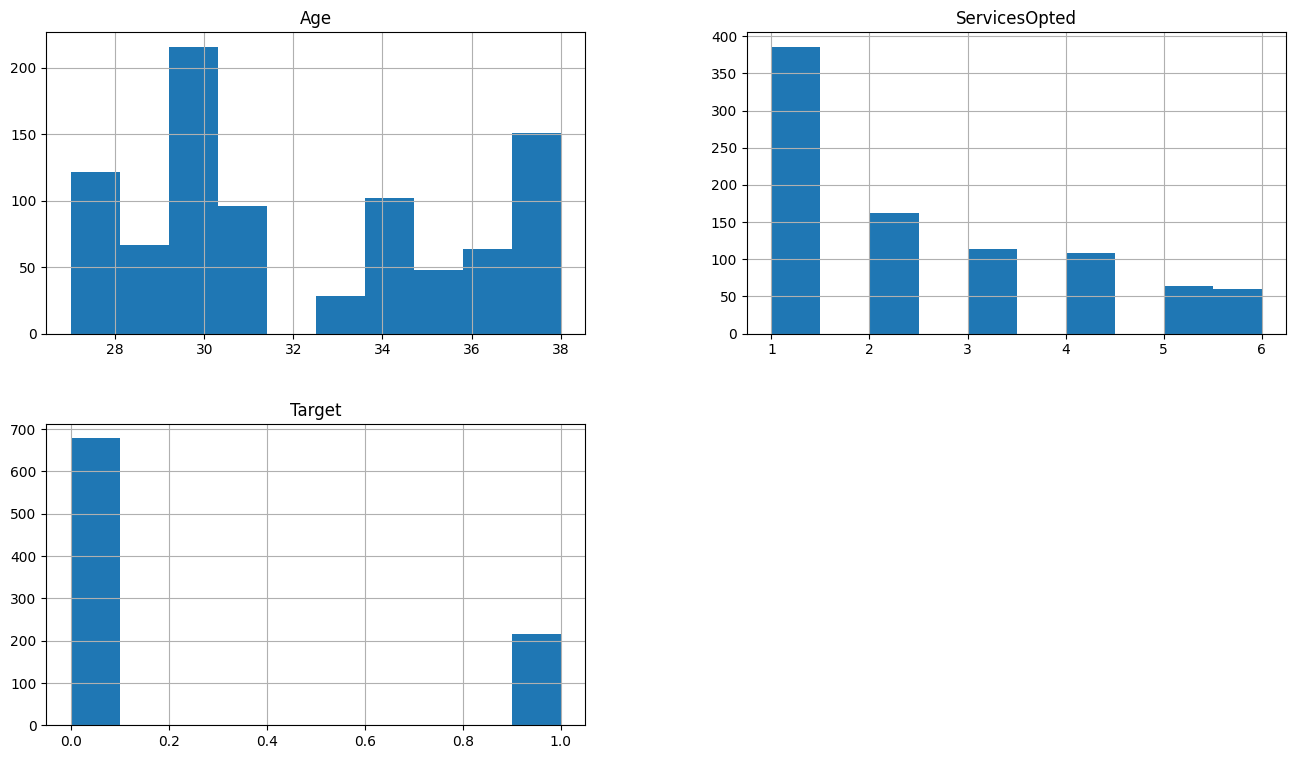

In [203]:
df.hist(figsize=(16, 9))

Min customer's age = 27
Max customer's age = 38



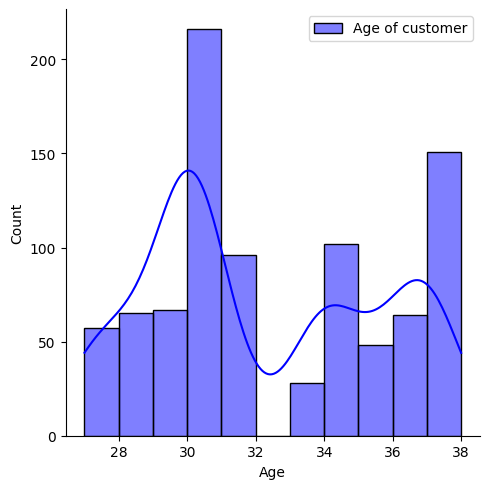

In [204]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"Min customer's age = {min_age}\nMax customer's age = {max_age}\n")

sns.displot(df['Age'], color='blue', label="Age of customer", kde=True)
plt.legend()
plt.show()

In [205]:
df_binarized = pd.DataFrame(index=df.index)

In [206]:
thresholds = [min_age, 29, 31, 33, 36, max_age]
for threshold in thresholds:
    df_binarized[f'age_le_{threshold}'] = df['Age'] <= threshold
    df_binarized[f'age_ge_{threshold}'] = df['Age'] >= threshold

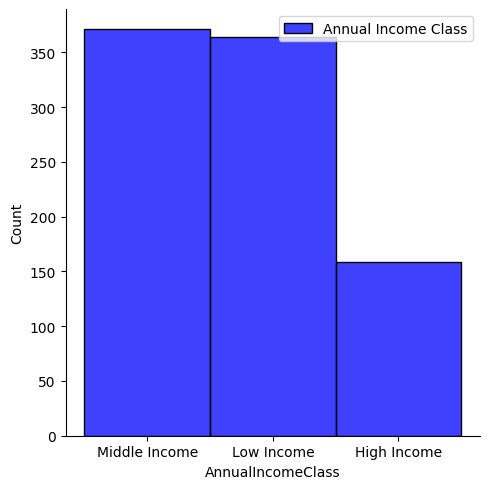

In [207]:
sns.displot(df['AnnualIncomeClass'], color='blue', label="Annual Income Class", kde=False)
plt.legend()
plt.show()

In [208]:
income2num = {
    'Low Income': 1,
    'Middle Income': 2,
    'High Income': 3
}

df = df.replace({'AnnualIncomeClass': income2num})

<ipython-input-208-3e9a4f34b786>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'AnnualIncomeClass': income2num})


In [209]:
thresholds = [1, 2, 3]
for threshold in thresholds:
    df_binarized[f'aic_le_{threshold}'] = df['AnnualIncomeClass'] <= threshold

In [210]:
df_binarized.head()

,age_le_27,age_ge_27,age_le_29,age_ge_29,age_le_31,age_ge_31,age_le_33,age_ge_33,age_le_36,age_ge_36,age_le_38,age_ge_38,aic_le_1,aic_le_2,aic_le_3
0,False,True,False,True,False,True,False,True,True,False,True,False,False,True,True
1,False,True,False,True,False,True,False,True,True,False,True,False,True,True,True
2,False,True,False,True,False,True,False,True,False,True,True,False,False,True,True
3,False,True,False,True,True,False,True,False,True,False,True,False,False,True,True
4,False,True,False,True,True,False,True,False,True,False,True,False,True,True,True


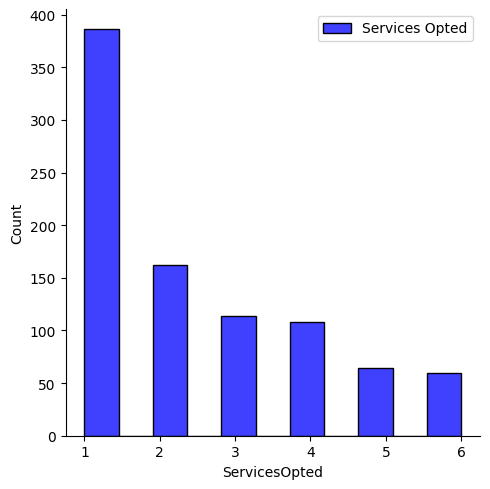

In [211]:
sns.displot(df['ServicesOpted'], color='blue', label="Services Opted", kde=False)
plt.legend()
plt.show()

In [212]:
thresholds = [1, 2, 3, 4, 5, 6]
for threshold in thresholds:
    df_binarized[f'services_opt_le_{threshold}'] = df['ServicesOpted'] <= threshold

In [213]:
df_binarized['FrequentFlyer'] = df['FrequentFlyer'].replace(['Yes', 'No'], [True, False])
df_binarized['BookedHotelOrNot'] = df['BookedHotelOrNot'].replace(['Yes', 'No'], [True, False])
df_binarized['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].replace(['Yes', 'No'], [True, False])

<ipython-input-213-c799cc0336bb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binarized['FrequentFlyer'] = df['FrequentFlyer'].replace(['Yes', 'No'], [True, False])
<ipython-input-213-c799cc0336bb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binarized['BookedHotelOrNot'] = df['BookedHotelOrNot'].replace(['Yes', 'No'], [True, False])
<ipython-input-213-c799cc0336bb>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `r

In [214]:
df_binarized.head()

,age_le_27,age_ge_27,age_le_29,age_ge_29,age_le_31,age_ge_31,age_le_33,age_ge_33,age_le_36,age_ge_36,...,aic_le_3,services_opt_le_1,services_opt_le_2,services_opt_le_3,services_opt_le_4,services_opt_le_5,services_opt_le_6,FrequentFlyer,BookedHotelOrNot,AccountSyncedToSocialMedia
0,False,True,False,True,False,True,False,True,True,False,...,True,False,False,False,False,False,True,False,True,False
1,False,True,False,True,False,True,False,True,True,False,...,True,False,False,False,False,True,True,True,False,True
2,False,True,False,True,False,True,False,True,False,True,...,True,False,False,True,True,True,True,False,False,True
3,False,True,False,True,True,False,True,False,True,False,...,True,False,True,True,True,True,True,False,False,False
4,False,True,False,True,True,False,True,False,True,False,...,True,True,True,True,True,True,True,False,False,False


In [215]:
df_binarized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 953
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age_le_27                   894 non-null    bool 
 1   age_ge_27                   894 non-null    bool 
 2   age_le_29                   894 non-null    bool 
 3   age_ge_29                   894 non-null    bool 
 4   age_le_31                   894 non-null    bool 
 5   age_ge_31                   894 non-null    bool 
 6   age_le_33                   894 non-null    bool 
 7   age_ge_33                   894 non-null    bool 
 8   age_le_36                   894 non-null    bool 
 9   age_ge_36                   894 non-null    bool 
 10  age_le_38                   894 non-null    bool 
 11  age_ge_38                   894 non-null    bool 
 12  aic_le_1                    894 non-null    bool 
 13  aic_le_2                    894 non-null    bool 
 14  aic_le_3       

In [216]:
df_binarized['Target'] = df['Target']

In [217]:
df_binarized['Target'].value_counts()

,count
Target,
0,678
1,216


We see that the number of positive labels is more than three times smaller than the number of negative labels. That's why we will measure the perfomance with F1 score. And also look at accuracy

## Train-test dataset split

In [218]:
from sklearn.model_selection import train_test_split

df_binarized.index = df_binarized.index.map(str)  # for fcapy api
y = df_binarized['Target']
X_train, X_test, y_train, y_test = train_test_split(df_binarized.drop(columns=['Target']), y, stratify=y, train_size=0.7, shuffle=True, random_state=42)

In [219]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((625, 24), (625,), (269, 24), (269,))

## Classification using standard ML tools

### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.5818181818181818
Accuracy score: 0.828996282527881


### Decision Tree

In [80]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.8
Accuracy score: 0.9070631970260223


In [84]:
from sklearn.model_selection import GridSearchCV


parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth' : [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 3, 5, 7, 10]}

tree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(tree, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.597 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.597 total time=   0.0s
[CV 4/5] END cri

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=3)

In [85]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.8125
Accuracy score: 0.9107806691449815


In [86]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

### Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.8032786885245902
Accuracy score: 0.9107806691449815


In [88]:
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth' : [1, 2, 3, 4, 5, 6],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 3, 5, 7, 10]}

forest = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(forest, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.597 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.000 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2;, score=0.493 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.605 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4;, score=0.597 total time=   0.0s
[CV 4/5] END cri

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 3, 5, 7, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='f1', verbose=3)

In [89]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.8125
Accuracy score: 0.9107806691449815


In [90]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

### Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7692307692307693
Accuracy score: 0.8884758364312267


In [92]:
parameters = {'learning_rate': [1, 0.1, 0.01, 0.001],
              'n_estimators':[10, 50, 100, 200],
              'subsample' : [1.0, 0.75, 0.5, 0.25]}

boost = GradientBoostingClassifier(random_state=42)
clf = GridSearchCV(boost, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.687 total time=   0.1s
[CV 2/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.727 total time=   0.1s
[CV 3/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.596 total time=   0.1s
[CV 4/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.821 total time=   0.1s
[CV 5/5] END learning_rate=1, n_estimators=10, subsample=1.0;, score=0.667 total time=   0.1s
[CV 1/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.724 total time=   0.1s
[CV 2/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.644 total time=   0.1s
[CV 3/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.561 total time=   0.1s
[CV 4/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.772 total time=   0.1s
[CV 5/5] END learning_rate=1, n_estimators=10, subsample=0.75;, score=0.667 total time= 

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': [10, 50, 100, 200],
                         'subsample': [1.0, 0.75, 0.5, 0.25]},
             scoring='f1', verbose=3)

In [93]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.7936507936507936
Accuracy score: 0.9033457249070632


### CatBoost

In [58]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [94]:
from catboost import CatBoostClassifier


clf = CatBoostClassifier(verbose=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.796875
Accuracy score: 0.9033457249070632


In [95]:
parameters = {'depth': [6, 8, 10],
              'learning_rate': [0.01, 0.05, 0.1],
              'iterations': [100, 200, 300]
              }

cb = CatBoostClassifier(verbose=False)
clf = GridSearchCV(cb, parameters, verbose = 3, scoring = 'f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.542 total time=   0.2s
[CV 2/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.642 total time=   0.2s
[CV 3/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.561 total time=   0.2s
[CV 4/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.600 total time=   0.1s
[CV 5/5] END depth=6, iterations=100, learning_rate=0.01;, score=0.490 total time=   0.2s
[CV 1/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.712 total time=   0.2s
[CV 2/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.700 total time=   0.2s
[CV 3/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.600 total time=   0.2s
[CV 4/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.679 total time=   0.2s
[CV 5/5] END depth=6, iterations=100, learning_rate=0.05;, score=0.691 total time=   0.2s
[CV 1/5] END depth=6, iterations=100, 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f57b656d9f0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='f1', verbose=3)

In [65]:
y_pred = clf.predict(X_test)
print('F1 score:', f1_score(y_test, y_pred))
print('Accuracy score:', accuracy_score(y_test, y_pred))

F1 score: 0.8095238095238095
Accuracy score: 0.9107806691449815


In [96]:
clf.best_params_

{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

## Neural FCA

In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1104576 sha256=7b5187de62b953931699e77a1aa8916b34ad4d6843fe3c94e309d96d69abdc4d
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully built torch-sparse
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-cluster: filename=torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl size=728767 sha256=c625dfb3d0db15d2c62de60278dfa1dd76758eaf2e3a591390659eaa2179c62b
  Stored in directory: /root/.cache/pip/wheels/51/78/c3/536637b3cdcc3313aa5e8851a6c72b97f6a01877e68c7595e3
Successfully 

In [220]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report

from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

import neural_lib as nl

In [221]:
K_train = FormalContext.from_pandas(X_train)
K_train

FormalContext (625 objects, 24 attributes, 8928 connections)
   |age_le_27|age_ge_27|age_le_29|age_ge_29|age_le_31|...|services_opt_le_5|services_opt_le_6|FrequentFlyer|BookedHotelOrNot|AccountSyncedToSocialMedia|
393|         |        X|         |        X|        X|...|                X|                X|            X|                |                          |
691|         |        X|         |        X|         |...|                X|                X|             |                |                          |
284|         |        X|         |        X|        X|...|                X|                X|             |                |                          |
246|         |        X|         |        X|         |...|                X|                X|            X|               X|                         X|
749|         |        X|         |        X|         |...|                X|                X|            X|                |                          |
198|        X|       

In [222]:
L = ConceptLattice.from_context(K_train, algo='Sofia', is_monotone=True)
len(L)

102

In [223]:
from sklearn.metrics import f1_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['f1_score'] = f1_score(y_train, y_preds)

In [224]:
n_concepts = 24
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [225]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))

In [226]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [227]:
descr = {'FrequentFlyer'}

traced = cn.trace_description(descr, include_targets=False)

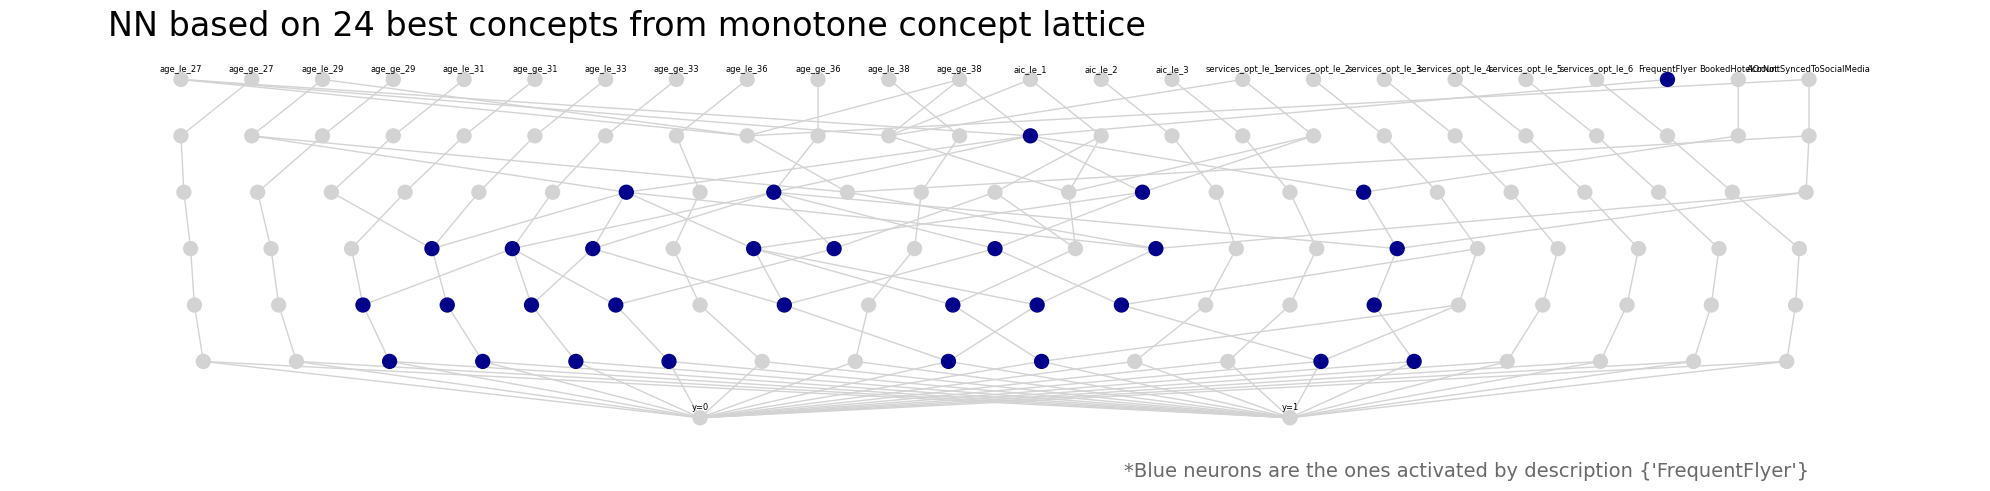

In [228]:
fig, ax = plt.subplots(figsize=(20,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))
                ],
               node_size=100,
               node_label_font_size=6
)
plt.title(f'NN based on '+str(n_concepts)+' best concepts from monotone concept lattice', loc='left', x=0.05, size=24)

plt.text(max(vis.mover.posx), min(vis.mover.posy)-0.3, f'*Blue neurons are the ones activated by description {descr}', fontsize=14, ha='right', color='dimgray')

plt.subplots_adjust()
plt.tight_layout()
plt.savefig('nn_baseline.png')
plt.show()

### 24 concepts, ReLU, 2000 epochs

In [155]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.ReLU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [0 0 0 0 0 0 0 0 0 0]
Class prediction with probabilities [[0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]
 [0.9982663  0.00173378]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.0
Accuracy score: 0.758364312267658


With ReLU network just predicts 0 all the time, let's try different activation function.

### 24 concepts, GELU, 2000 epochs

In [156]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 0 0 0 0 0 1]
Class prediction with probabilities [[3.1683293e-01 6.8316710e-01]
 [9.9999964e-01 3.5037260e-07]
 [4.5169213e-06 9.9999547e-01]
 [1.0000000e+00 7.3397744e-13]
 [8.8220096e-01 1.1779905e-01]
 [9.9999964e-01 3.4656091e-07]
 [1.0000000e+00 7.5500092e-12]
 [1.0000000e+00 3.1089723e-12]
 [1.0000000e+00 2.3640391e-13]
 [4.0933702e-04 9.9959069e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.6271186440677966
Accuracy score: 0.8364312267657993


Not constant prediction, cool! But we can see that the model is overconfident. Let's look at weights

In [157]:
edge_weights = cn.edge_weights_from_network()

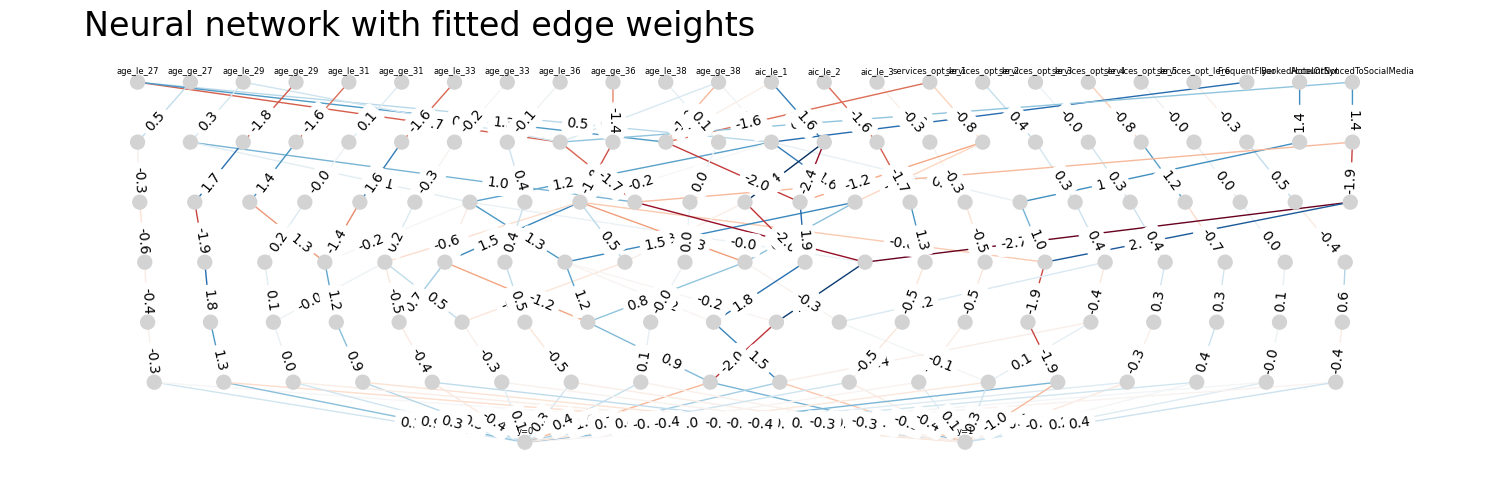

In [158]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=6
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_gelu_e24.png')
plt.show()

### 24 concepts, SiLU, 2000 epochs

In [160]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.SiLU)

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [0 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[6.1166805e-01 3.8833198e-01]
 [9.9999583e-01 4.1970338e-06]
 [2.8113497e-02 9.7188652e-01]
 [1.0000000e+00 8.7909973e-09]
 [1.4330617e-01 8.5669380e-01]
 [9.9999416e-01 5.8867372e-06]
 [1.0000000e+00 1.1143554e-08]
 [1.0000000e+00 1.9083910e-09]
 [1.0000000e+00 3.4541734e-09]
 [1.5542963e-02 9.8445708e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.543859649122807
Accuracy score: 0.8066914498141264


Also not bad result, but if we run multiple times we will see that it is worse than GELU. (sometimes f1 becomes ~0.62)

### Focal Loss

Cause we have imbalanced dataset (1:3 positives to negatives) and we see above that our network is overconfident, let's try loss that could solve these problems -- Focal Loss

In [97]:
#  Genuinely took from https://github.com/mathiaszinnen/focal_loss_torch

import torch
import torch.nn as nn
from torch.nn.functional import one_hot
from torch import Tensor
from typing import Union


class FocalLoss(nn.Module):
    """Computes the focal loss between input and target
    as described here https://arxiv.org/abs/1708.02002v2

    Args:
        gamma (float):  The focal loss focusing parameter.
        weights (Union[None, Tensor]): Rescaling weight given to each class.
        If given, has to be a Tensor of size C. optional.
        reduction (str): Specifies the reduction to apply to the output.
        it should be one of the following 'none', 'mean', or 'sum'.
        default 'mean'.
        ignore_index (int): Specifies a target value that is ignored and
        does not contribute to the input gradient. optional.
        eps (float): smoothing to prevent log from returning inf.
    """
    def __init__(
            self,
            gamma,
            weights: Union[None, Tensor] = None,
            reduction: str = 'mean',
            ignore_index=-100,
            eps=1e-16
            ) -> None:
        super().__init__()
        if reduction not in ['mean', 'none', 'sum']:
            raise NotImplementedError(
                'Reduction {} not implemented.'.format(reduction)
                )
        assert weights is None or isinstance(weights, Tensor), \
            'weights should be of type Tensor or None, but {} given'.format(
                type(weights))
        self.reduction = reduction
        self.gamma = gamma
        self.ignore_index = ignore_index
        self.eps = eps
        self.weights = weights

    def _get_weights(self, target: Tensor) -> Tensor:
        if self.weights is None:
            return torch.ones(target.shape[0])
        weights = target * self.weights
        return weights.sum(dim=-1)

    def _process_target(
            self, target: Tensor, num_classes: int, mask: Tensor
            ) -> Tensor:

        #convert all ignore_index elements to zero to avoid error in one_hot
        #note - the choice of value 0 is arbitrary, but it should not matter as these elements will be ignored in the loss calculation
        target = target * (target!=self.ignore_index)
        target = target.view(-1)
        return one_hot(target, num_classes=num_classes)

    def _process_preds(self, x: Tensor) -> Tensor:
        if x.dim() == 1:
            x = torch.vstack([1 - x, x])
            x = x.permute(1, 0)
            return x
        return x.view(-1, x.shape[-1])

    def _calc_pt(
            self, target: Tensor, x: Tensor, mask: Tensor
            ) -> Tensor:
        p = target * x
        p = p.sum(dim=-1)
        p = p * ~mask
        return p

    def forward(self, x: Tensor, target: Tensor) -> Tensor:
        assert torch.all((x >= 0.0) & (x <= 1.0)), ValueError(
            'The predictions values should be between 0 and 1, \
                make sure to pass the values to sigmoid for binary \
                classification or softmax for multi-class classification'
        )
        mask = target == self.ignore_index
        mask = mask.view(-1)
        x = self._process_preds(x)
        num_classes = x.shape[-1]
        target = self._process_target(target, num_classes, mask)
        weights = self._get_weights(target).to(x.device)
        pt = self._calc_pt(target, x, mask)
        focal = 1 - pt
        nll = -torch.log(self.eps + pt)
        nll = nll.masked_fill(mask, 0)
        loss = weights * (focal ** self.gamma) * nll
        return self._reduce(loss, mask, weights)

    def _reduce(self, x: Tensor, mask: Tensor, weights: Tensor) -> Tensor:
        if self.reduction == 'mean':
            return x.sum() / (~mask * weights).sum()
        elif self.reduction == 'sum':
            return x.sum()
        else:
            return x

In [162]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=2))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [0 0 1 0 1 0 1 0 0 1]
Class prediction with probabilities [[0.58883536 0.41116464]
 [0.73576534 0.2642346 ]
 [0.20700938 0.79299057]
 [0.9385104  0.06148958]
 [0.2665135  0.73348653]
 [0.73704433 0.26295573]
 [0.41316175 0.5868382 ]
 [0.98441875 0.01558128]
 [0.9989448  0.00105526]
 [0.22108129 0.77891874]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7230769230769231
Accuracy score: 0.8661710037174721


Wow focal loss increased the f1-score by 0.1, it is really big improvement!

In [163]:
edge_weights = cn.edge_weights_from_network()

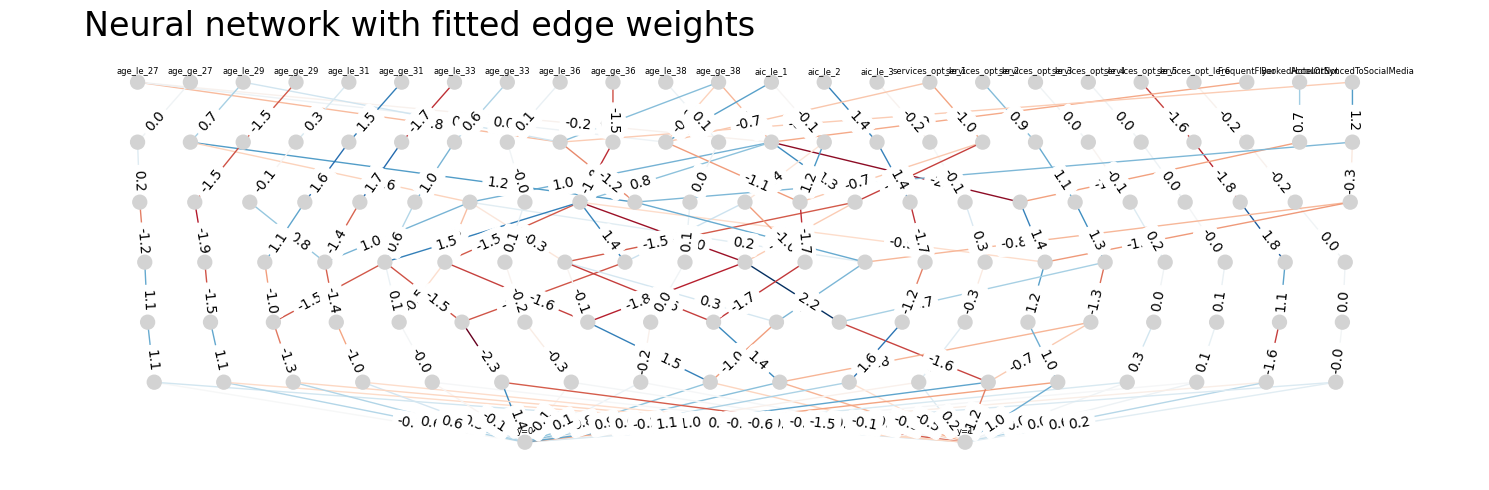

In [164]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=6
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_fl_g2_e2000_c24.png')
plt.show()

### Adding more concepts

In [165]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [167]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=2))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[4.8423201e-01 5.1576805e-01]
 [6.8494964e-01 3.1505030e-01]
 [2.0136110e-01 7.9863888e-01]
 [8.7509817e-01 1.2490186e-01]
 [3.1584697e-03 9.9684155e-01]
 [6.4439672e-01 3.5560331e-01]
 [8.5745442e-01 1.4254552e-01]
 [9.9837983e-01 1.6201393e-03]
 [9.9930775e-01 6.9226482e-04]
 [4.4164875e-01 5.5835128e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7317073170731707
Accuracy score: 0.8773234200743495


f1-score became even larger! (+0.008)

### 24 concepts, less gamma (1.5)

In [168]:
n_concepts = 24
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [173]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1.5))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 1 0 0 1]
Class prediction with probabilities [[4.7408184e-01 5.2591813e-01]
 [8.9953846e-01 1.0046156e-01]
 [1.5254617e-01 8.4745383e-01]
 [9.3135571e-01 6.8644300e-02]
 [2.7687690e-01 7.2312307e-01]
 [8.4675705e-01 1.5324292e-01]
 [3.8292021e-01 6.1707985e-01]
 [9.9223220e-01 7.7677360e-03]
 [9.9914289e-01 8.5705536e-04]
 [1.9433014e-01 8.0566984e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7154471544715447
Accuracy score: 0.8698884758364313


### 50 concepts, less gamma (1.5)

In [174]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [184]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1.5))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[3.7792772e-01 6.2207234e-01]
 [6.7869604e-01 3.2130393e-01]
 [7.8124933e-02 9.2187512e-01]
 [9.8330760e-01 1.6692404e-02]
 [6.9010429e-02 9.3098956e-01]
 [6.6001952e-01 3.3998051e-01]
 [9.2453229e-01 7.5467698e-02]
 [9.9972159e-01 2.7839752e-04]
 [9.9999833e-01 1.7215341e-06]
 [4.4149524e-01 5.5850470e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7131782945736435
Accuracy score: 0.862453531598513


### 24 concepts, gamma=1

In [138]:
n_concepts = 24
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [139]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [0 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[5.1963550e-01 4.8036444e-01]
 [8.2367122e-01 1.7632879e-01]
 [5.7503823e-02 9.4249618e-01]
 [9.4541788e-01 5.4582059e-02]
 [6.5912917e-02 9.3408704e-01]
 [8.8087296e-01 1.1912704e-01]
 [5.7868415e-01 4.2131579e-01]
 [9.9874794e-01 1.2520530e-03]
 [9.9993575e-01 6.4270920e-05]
 [1.1972288e-01 8.8027716e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.736
Accuracy score: 0.8773234200743495


+0.005 f1-score improvement, best for now

In [140]:
edge_weights = cn.edge_weights_from_network()

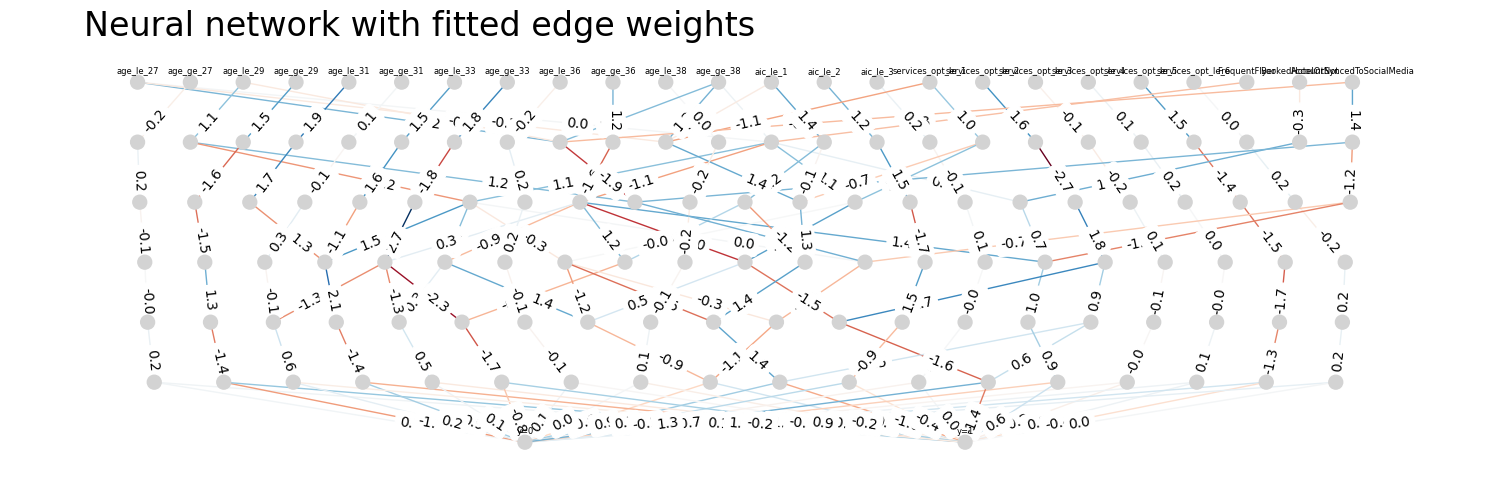

In [141]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,5))

vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,

               node_size=100,
               node_label_font_size=6
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_g_fl1_c24_e2000.png')
plt.show()

### 50 concepts, gamma=1, best for now

In [186]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [190]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[4.3058512e-01 5.6941485e-01]
 [7.5384581e-01 2.4615416e-01]
 [2.0673919e-02 9.7932613e-01]
 [9.9950683e-01 4.9316930e-04]
 [1.4082299e-03 9.9859172e-01]
 [7.2766751e-01 2.7233246e-01]
 [8.6936301e-01 1.3063699e-01]
 [1.0000000e+00 3.4656231e-09]
 [1.0000000e+00 2.0049405e-14]
 [5.6483563e-02 9.4351637e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.768
Accuracy score: 0.8921933085501859


Wow, another big improvement! +0.038

### More epochs

In [229]:
n_concepts = 50
best_concepts = list(L.measures['f1_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [232]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=3000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[8.7495744e-02 9.1250426e-01]
 [7.5182116e-01 2.4817881e-01]
 [1.6319971e-03 9.9836797e-01]
 [9.8291785e-01 1.7082203e-02]
 [6.7671941e-04 9.9932325e-01]
 [6.8813217e-01 3.1186783e-01]
 [9.6763557e-01 3.2364443e-02]
 [9.9993312e-01 6.6914239e-05]
 [9.9990475e-01 9.5246651e-05]
 [7.1250852e-03 9.9287498e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7538461538461538
Accuracy score: 0.8810408921933085


In [235]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=4000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 0 0 0 1]
Class prediction with probabilities [[9.6611753e-02 9.0338820e-01]
 [7.9341561e-01 2.0658439e-01]
 [1.1467127e-03 9.9885333e-01]
 [9.9827361e-01 1.7264311e-03]
 [3.1367082e-02 9.6863294e-01]
 [6.8291938e-01 3.1708062e-01]
 [7.5116700e-01 2.4883303e-01]
 [9.9524033e-01 4.7596702e-03]
 [9.9999619e-01 3.7585835e-06]
 [2.0854721e-02 9.7914529e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.765625
Accuracy score: 0.8884758364312267


In [242]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train, n_epochs=5000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 1 0 0 1]
Class prediction with probabilities [[8.45561698e-02 9.15443838e-01]
 [8.06325018e-01 1.93674952e-01]
 [1.46899372e-04 9.99853134e-01]
 [9.99637961e-01 3.61995277e-04]
 [1.10319890e-02 9.88968074e-01]
 [8.49738300e-01 1.50261715e-01]
 [1.17517576e-01 8.82482409e-01]
 [9.99999881e-01 1.50930589e-07]
 [1.00000000e+00 2.77679977e-08]
 [2.32774368e-03 9.97672260e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7244094488188977
Accuracy score: 0.8698884758364313


5000 epochs is too much.

### Let's also try to choose concepts based on recall, cause we really need to determine True labels correctly.

In [144]:
from sklearn.metrics import recall_score

for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    c.measures['recall_score'] = recall_score(y_train, y_preds)

In [150]:
n_concepts = 24
best_concepts = list(L.measures['recall_score'].argsort()[::-1][:n_concepts])
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

In [151]:
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(y_train)))
cn.fit(X_train, y_train,  n_epochs=2000, nonlinearity=nn.GELU, loss_fn=FocalLoss(gamma=1))

y_pred = cn.predict(X_test).numpy()
print('Class prediction', y_pred[:10])
y_proba = cn.predict_proba(X_test).detach().numpy()
print('Class prediction with probabilities', y_proba[:10])
print('True class', y_test.values[:10])

print('F1 score:', f1_score(y_test.values.astype('int'), y_pred))
print('Accuracy score:', accuracy_score(y_test.values.astype('int'), y_pred))

Class prediction [1 0 1 0 1 0 1 0 0 1]
Class prediction with probabilities [[4.5392206e-01 5.4607797e-01]
 [6.9309562e-01 3.0690432e-01]
 [4.4595259e-01 5.5404735e-01]
 [9.9999940e-01 5.5879002e-07]
 [3.6421642e-01 6.3578355e-01]
 [7.7524519e-01 2.2475481e-01]
 [3.6856768e-01 6.3143235e-01]
 [1.0000000e+00 4.8595123e-08]
 [1.0000000e+00 5.6181387e-10]
 [4.6476108e-01 5.3523898e-01]]
True class [1 0 1 0 1 0 0 0 0 1]
F1 score: 0.7114093959731543
Accuracy score: 0.8401486988847584


It didn't get any better